In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import healpy as hp

In [2]:
def radec_to_sph(ra,dc):
    
    theta = (90.-dc)*np.pi/180.
    phi   = ra*np.pi/180.
    return theta, phi

In [3]:
Fcat = Table.read("../Victoria_v1.1_SED_catalogs/Master_Catalog_F_test_AGN_full_photometry.fits")

In [11]:
#Convert to ra/dec
theta, phi = radec_to_sph(Fcat['ra'],Fcat['dec'])

#set up the healpix grid.
NSIDE=64
npix = hp.nside2npix(NSIDE)
total_degrees_in_sky = 4.*np.pi*(180./np.pi)**2
area_per_pixel = total_degrees_in_sky/(1.*npix)
n = hp.ang2pix(NSIDE, theta, phi)

#Load up the healpix array and display it. 
h = np.histogram(n,hp.nside2npix(NSIDE),
                 range=(0,hp.nside2npix(NSIDE)-1))[0]
h = h.astype(np.float64)

82.0


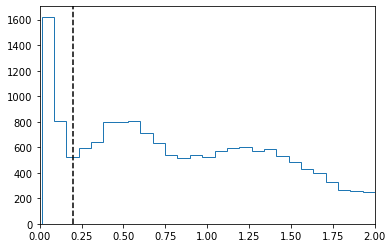

In [21]:
h_norm = h/np.median(h[h>0])
print(np.median(h[h>0]))
plt.hist(h_norm[h>0], bins=200, histtype='step')
plt.xlim([0,2])
plt.ylim(plt.ylim())
plt.plot([0.2, 0.2], plt.ylim(),'k--')
plt.show()